<a href="https://colab.research.google.com/github/Sanskruti-Shimple/Temperature-Sensor-Failure-Detection-and-Diagnosis-Based-on-the-ARIMA-Model/blob/main/LM_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
def parser(x):
  return datetime.strptime(x,'%H:%M:%S')

pro = pd.read_csv('/content/LM35_Healthy.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 21:41:06,53.76
1900-01-01 21:41:09,54.25
1900-01-01 21:41:12,54.74
1900-01-01 21:41:14,55.23
1900-01-01 21:41:17,55.72


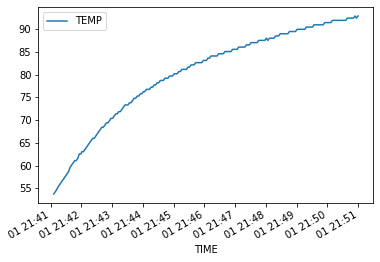

In [ ]:
pro.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


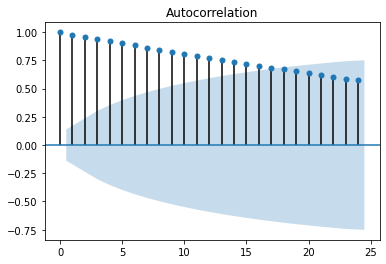

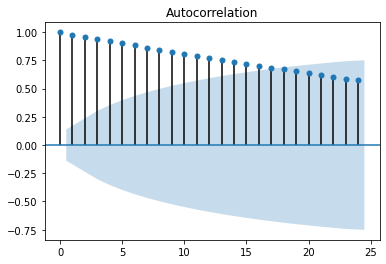

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pro)


##Converting series to stationary

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 21:41:06,53.76
1900-01-01 21:41:09,54.25
1900-01-01 21:41:12,54.74
1900-01-01 21:41:14,55.23
1900-01-01 21:41:17,55.72


In [ ]:
pro.shift(1)

,TEMP
TIME,
1900-01-01 21:41:06,NaN
1900-01-01 21:41:09,53.76
1900-01-01 21:41:12,54.25
1900-01-01 21:41:14,54.74
1900-01-01 21:41:17,55.23
...,...
1900-01-01 21:50:48,92.38
1900-01-01 21:50:51,92.38
1900-01-01 21:50:54,92.38


In [ ]:
pro_diff = pro.diff(periods=1)
pro_diff = pro_diff[3:]
pro_diff.head()

,TEMP
TIME,
1900-01-01 21:41:14,0.49
1900-01-01 21:41:17,0.49
1900-01-01 21:41:20,0.49
1900-01-01 21:41:23,0.49
1900-01-01 21:41:26,0.48


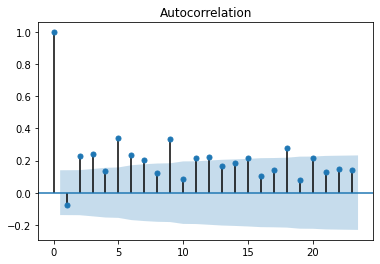

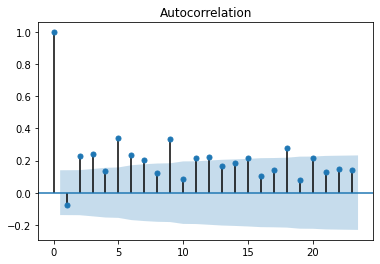

In [ ]:
plot_acf(pro_diff)

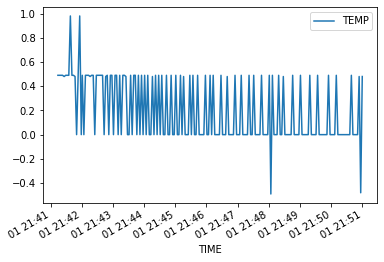

In [ ]:
pro_diff.plot()

In [ ]:
X = pro.values
train = X[0:149] # 35 data as train data
test = X[150:]  # 16 data as test data
predictions = []
print(train.size)
print(test.size)

149
50


##Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=149,end=200)

##ARIMA model

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(3, 2, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) #lesser the aic values better is the model

-44.29181759250645


In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

array([88.82305804, 88.90952114, 89.00153153, 89.06893087, 89.15119502,
       89.23307352, 89.31380137, 89.39451603, 89.4738022 , 89.55133402,
       89.6268633 , 89.70009674, 89.77085811, 89.83900891, 89.90443986,
       89.9670708 , 90.02684048, 90.08370236, 90.13762133, 90.18857075,
       90.23653044, 90.28148511, 90.32342318, 90.3623359 , 90.3982166 ,
       90.43106026, 90.46086307, 90.48762214, 90.51133528, 90.53200083,
       90.54961755, 90.56418447, 90.57570088, 90.58416623, 90.58958011,
       90.59194221, 90.59125229, 90.58751016, 90.5807157 , 90.5708688 ,
       90.55796939, 90.54201739, 90.52301277, 90.5009555 , 90.47584555,
       90.44768289, 90.41646752, 90.38219942, 90.34487859, 90.30450501])

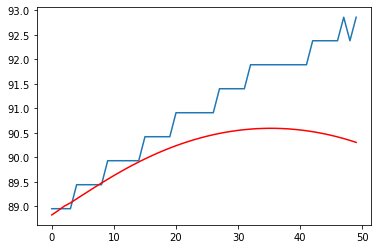

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')


In [ ]:
mean_squared_error(test,predictions)

1.1867003184708607

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1104.0987035459032
(0, 0, 1) 909.234602981076
(0, 0, 2) 751.0868742718341
(0, 0, 3) 619.113648069902
(0, 0, 4) 531.5025324035336
(0, 1, 0) 29.192461928505935
(0, 1, 1) 30.200082270088842
(0, 1, 2) 21.848764849758822
(0, 1, 3) 19.068991801618893
(0, 1, 4) 18.067572553161654
(0, 2, 0) 145.08523270193237
(0, 2, 1) 1.3908863171592998
(1, 0, 0) 127.91684475062118
(1, 0, 1) 117.36715401953927
(1, 0, 2) 93.09726278977416
(1, 0, 3) 84.57745724707485
(1, 0, 4) 79.20370053316412
(1, 1, 0) 29.705756964929776
(1, 1, 1) 33.17233903406918
(1, 1, 2) -32.59843892119102
(1, 1, 3) -30.93416198957277
(1, 1, 4) -29.38518673638231
(1, 2, 0) 66.09647469003613
(1, 2, 3) -40.75238107865931
(2, 0, 0) 105.73482600405009
(2, 0, 2) -16.153747902716646
(2, 1, 0) 23.999136778902823
(2, 1, 1) 33.68947220111272
(2, 1, 2) -30.997955458391743
(2, 1, 3) -31.965140123252354
(2, 1, 4) -29.99481159494735
(2, 2, 0) 25.47916232226612
(2, 2, 1) -32.443241739470466
(3, 0, 0) 167.6437959897857
(3, 1, 0) 9.284947120697

In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

array([88.67243109, 88.90016598, 89.08265013, 88.96282069, 89.05365561,
       89.20883587, 89.25011415, 89.25675079, 89.30377072, 89.40170054,
       89.4638917 , 89.46447628, 89.49587918, 89.57461315, 89.6212736 ,
       89.62348934, 89.64544007, 89.70036245, 89.73513727, 89.73561029,
       89.74669121, 89.78232617, 89.80458049, 89.80023317, 89.80110062,
       89.81959221, 89.829126  , 89.81812487, 89.80876596, 89.81175921,
       89.80862968, 89.78955389, 89.76988934, 89.75858265, 89.74289935,
       89.71473882, 89.68463391, 89.65988185, 89.63179341, 89.59382531,
       89.55312612, 89.51553852, 89.47519891, 89.42690999, 89.37546598,
       89.32547398, 89.2730278 , 89.21405654, 89.1517308 , 89.08963699])

In [ ]:
 df = pd.DataFrame(predictions)  #to arrange data like excel sheet
 df.columns = ["TEMP"]
 df

,TEMP
0,88.672431
1,88.900166
2,89.082650
3,88.962821
4,89.053656
5,89.208836
6,89.250114
7,89.256751
8,89.303771
9,89.401701


In [ ]:
df.to_csv('prediction.csv') 

In [ ]:
edi = pd.read_csv('/content/prediction.csv')
edi2=pd.read_csv('/content/LM35_Faulty.csv')
print(edi)
print(edi2)

    Unnamed: 0       TEMP
0            0  88.672431
1            1  88.900166
2            2  89.082650
3            3  88.962821
4            4  89.053656
5            5  89.208836
6            6  89.250114
7            7  89.256751
8            8  89.303771
9            9  89.401701
10          10  89.463892
11          11  89.464476
12          12  89.495879
13          13  89.574613
14          14  89.621274
15          15  89.623489
16          16  89.645440
17          17  89.700362
18          18  89.735137
19          19  89.735610
20          20  89.746691
21          21  89.782326
22          22  89.804580
23          23  89.800233
24          24  89.801101
25          25  89.819592
26          26  89.829126
27          27  89.818125
28          28  89.808766
29          29  89.811759
30          30  89.808630
31          31  89.789554
32          32  89.769889
33          33  89.758583
34          34  89.742899
35          35  89.714739
36          36  89.684634
37          

In [ ]:
i=1
j=0
k=0
z=edi2['INDEX'][edi2.index[-1]]

while (i <z):
    a= ((edi['TEMP'][i]-edi2['TEMP'][i]))
    if (a>0):
        j=j+1
        if(j>=2):
            print("wire is loose ,error occured",end=" ")
            print(j,end=" ")
            print("times")
    if (0.8<a<2):
        k=k+1
        if (k>=2):
            print("some insulation is done on sensor ",end=" ")
            print(k,end=" ")
            print("times")
    if (a>1.5):
        k=k+1
        if (k>=2):
            print("wire has been removed ",end=" ")
            print(k,end=" ")
            print("times")        
    i=i+1
    

wire is loose ,error occured 2 times
wire has been removed  2 times
wire is loose ,error occured 3 times
wire has been removed  3 times
wire is loose ,error occured 4 times
wire has been removed  4 times
wire is loose ,error occured 5 times
wire has been removed  5 times
wire is loose ,error occured 6 times
wire has been removed  6 times
wire is loose ,error occured 7 times
wire has been removed  7 times
wire is loose ,error occured 8 times
wire has been removed  8 times
wire is loose ,error occured 9 times
wire has been removed  9 times
wire is loose ,error occured 10 times
wire has been removed  10 times
wire is loose ,error occured 11 times
wire has been removed  11 times
wire is loose ,error occured 12 times
wire has been removed  12 times
wire is loose ,error occured 13 times
wire has been removed  13 times
wire is loose ,error occured 14 times
wire has been removed  14 times
wire is loose ,error occured 15 times
wire has been removed  15 times
wire is loose ,error occured 16 time

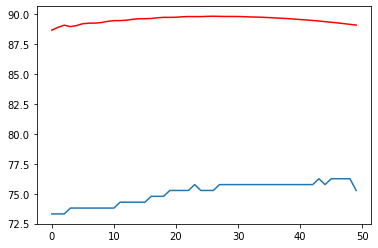

In [ ]:
plt.plot(edi2["TEMP"])
plt.plot(predictions,color='red')